In [363]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [364]:
# Load the Dataset
df_ttr = pd.read_csv('dataset_1621188.csv')

# Display the first few rows of the dataset
df_ttr.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type
0,1,05/19/2023,10:06:47,1,3,Breda,3.5,Bakery,Pie
1,2,05/17/2023,08:51:00,5,3,Breda,3.5,Coffee,Milk coffee
2,3,05/20/2023,13:26:48,2,2,Groningen,3.5,Coffee,Milk coffee
3,4,05/18/2023,14:07:38,1,3,Breda,4.5,Chocolate,Hot chocolate
4,5,05/18/2023,12:09:29,4,2,Groningen,4.5,Chocolate,Hot chocolate


# Data Cleaning & Preparation

In [365]:
df_ttr.describe()

,transaction_id,transaction_qty,store_id,unit_price
count,7619.000000,7619.000000,7619.000000,7619.000000
mean,3810.000000,2.006694,1.996062,3.774642
std,2199.560183,1.203754,0.718605,0.935429
min,1.000000,1.000000,1.000000,2.000000
25%,1905.500000,1.000000,1.000000,3.150000
50%,3810.000000,2.000000,2.000000,3.500000
75%,5714.500000,2.000000,3.000000,4.500000
max,7619.000000,6.000000,3.000000,6.300000


In [366]:
df_ttr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7619 entries, 0 to 7618
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    7619 non-null   int64  
 1   transaction_date  7471 non-null   object 
 2   transaction_time  7551 non-null   object 
 3   transaction_qty   7619 non-null   int64  
 4   store_id          7619 non-null   int64  
 5   store_location    7619 non-null   object 
 6   unit_price        7619 non-null   float64
 7   product_category  7619 non-null   object 
 8   product_type      7619 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 535.8+ KB


In [367]:
# Check for missing values
missing_values = df_ttr.isnull().sum()
print(missing_values)

# Drop rows with missing values
df_ttr = df_ttr.dropna()

transaction_id        0
transaction_date    148
transaction_time     68
transaction_qty       0
store_id              0
store_location        0
unit_price            0
product_category      0
product_type          0
dtype: int64


In [368]:
# Formatting of data types and creation of new columns

# Change the data type of the 'transaction_date' column to datetime
df_ttr['transaction_date'] = pd.to_datetime(df_ttr['transaction_date'])

# Change the data type of the 'transaction_time' column
df_ttr['transaction_time'] = pd.to_datetime(df_ttr['transaction_time'], format='%H:%M:%S').dt.time

# Extract the year, month, and day of the week from the 'transaction_date' column
df_ttr['day_of_week'] = df_ttr['transaction_date'].dt.day_of_week
df_ttr['day_of_week'] = df_ttr['day_of_week'] + 1 # add 1 to every day of the week to make it start from 1 to 7
df_ttr['day_name'] = df_ttr['transaction_date'].dt.day_name() # add a new column 'day_name' to represent the name of the day

df_ttr.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,day_of_week,day_name
0,1,2023-05-19,10:06:47,1,3,Breda,3.5,Bakery,Pie,5,Friday
1,2,2023-05-17,08:51:00,5,3,Breda,3.5,Coffee,Milk coffee,3,Wednesday
2,3,2023-05-20,13:26:48,2,2,Groningen,3.5,Coffee,Milk coffee,6,Saturday
3,4,2023-05-18,14:07:38,1,3,Breda,4.5,Chocolate,Hot chocolate,4,Thursday
4,5,2023-05-18,12:09:29,4,2,Groningen,4.5,Chocolate,Hot chocolate,4,Thursday


In [369]:
# Show unique values of each column
for column in df_ttr.columns:
    print(f"Unique values in {column}:")
    print(df_ttr[column].unique())
    print("\n")

# Check for duplicate rows
duplicate_rows = df_ttr.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# No spelling errors in the columns, so no changes are needed
# No duplicate rows, so no changes are needed



Unique values in transaction_id:
[   1    2    3 ... 7617 7618 7619]


Unique values in transaction_date:
<DatetimeArray>
['2023-05-19 00:00:00', '2023-05-17 00:00:00', '2023-05-20 00:00:00',
 '2023-05-18 00:00:00', '2023-05-16 00:00:00', '2023-05-21 00:00:00',
 '2023-05-15 00:00:00']
Length: 7, dtype: datetime64[ns]


Unique values in transaction_time:
[datetime.time(10, 6, 47) datetime.time(8, 51) datetime.time(13, 26, 48)
 ... datetime.time(11, 36) datetime.time(8, 44, 15)
 datetime.time(14, 43, 58)]


Unique values in transaction_qty:
[1 5 2 4 6 3]


Unique values in store_id:
[3 2 1]


Unique values in store_location:
['Breda' 'Groningen' 'Alkmaar']


Unique values in unit_price:
[3.5  4.5  4.25 3.75 6.3  3.   2.   3.15 3.25]


Unique values in product_category:
['Bakery' 'Coffee' 'Chocolate' 'Tea']


Unique values in product_type:
['Pie' 'Milk coffee' 'Hot chocolate' 'Syrup coffee' 'Sandwich'
 'Organic blended coffee' 'Herbal tea' 'Scone' 'Black coffee' 'Green tea'
 'Black tea' '

In [370]:
# Dropping the 'transaction_id' column
df_ttr = df_ttr.drop('transaction_id', axis=1)

df_ttr.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,day_of_week,day_name
0,2023-05-19,10:06:47,1,3,Breda,3.5,Bakery,Pie,5,Friday
1,2023-05-17,08:51:00,5,3,Breda,3.5,Coffee,Milk coffee,3,Wednesday
2,2023-05-20,13:26:48,2,2,Groningen,3.5,Coffee,Milk coffee,6,Saturday
3,2023-05-18,14:07:38,1,3,Breda,4.5,Chocolate,Hot chocolate,4,Thursday
4,2023-05-18,12:09:29,4,2,Groningen,4.5,Chocolate,Hot chocolate,4,Thursday


# Question 1
The quantity of items sold varies per transaction. 
TTR would like to know what the probability is that a transaction contains more than 2 items sold. 
Report and explain your analysis and conclusion.

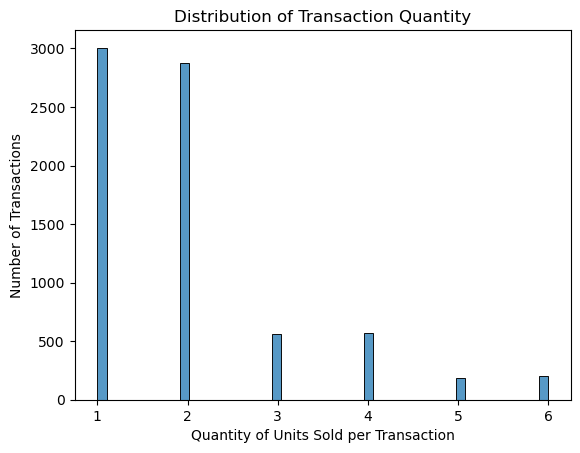

In [371]:
# distribution of the quantity of items sold per transaction in the dataset
sns.histplot(df_ttr['transaction_qty'])
plt.title('Distribution of Transaction Quantity')
plt.xlabel('Quantity of Units Sold per Transaction')
plt.ylabel('Number of Transactions')
plt.show()

In [372]:
# Count the number of transactions with more than 2 items sold in a single transaction
transactions_more_than_2_items = df_ttr[df_ttr['transaction_qty'] > 2].shape[0]
print("The number of transactions with more than 2 items sold is:", transactions_more_than_2_items)

# Count the total number of transactions in the dataset
total_transactions = df_ttr.shape[0]
print("The total number of transactions is:", total_transactions)

# The probability that a transaction contains more than 2 items sold
prob = transactions_more_than_2_items / total_transactions

# Probability of a transaction containing more than 2 items sold
print("The probability that a transaction contains more than 2 items sold is:", prob)

# The probability is 0.20515 or 20.52%

The number of transactions with more than 2 items sold is: 1519
The total number of transactions is: 7404
The probability that a transaction contains more than 2 items sold is: 0.2051593733117234


# Question 2
TTR would like to obtain insight in how the unit price varies for the product types that they sell. 
Conduct appropriate analysis, report relevant descriptive statistics and use visualizations when reporting your findings. 
Include skewness in your interpretation.

In [373]:
df_ttr.groupby('product_type')['unit_price'].describe()

,count,mean,std,min,25%,50%,75%,max
product_type,,,,,,,,
Black coffee,495.0,2.00,0.000000e+00,2.00,2.00,2.00,2.00,2.00
Black tea,467.0,3.00,0.000000e+00,3.00,3.00,3.00,3.00,3.00
Chai tea,437.0,3.25,0.000000e+00,3.25,3.25,3.25,3.25,3.25
Green tea,427.0,3.15,9.781423e-15,3.15,3.15,3.15,3.15,3.15
Herbal tea,464.0,3.50,0.000000e+00,3.50,3.50,3.50,3.50,3.50
Hot chocolate,1877.0,4.50,0.000000e+00,4.50,4.50,4.50,4.50,4.50
Milk coffee,450.0,3.50,0.000000e+00,3.50,3.50,3.50,3.50,3.50
Organic blended coffee,431.0,6.30,2.045184e-14,6.30,6.30,6.30,6.30,6.30
Pie,638.0,3.50,0.000000e+00,3.50,3.50,3.50,3.50,3.50


                         count  mean           std   min   25%   50%   75%  \
product_type                                                                 
Black coffee             495.0  2.00  0.000000e+00  2.00  2.00  2.00  2.00   
Black tea                467.0  3.00  0.000000e+00  3.00  3.00  3.00  3.00   
Chai tea                 437.0  3.25  0.000000e+00  3.25  3.25  3.25  3.25   
Green tea                427.0  3.15  9.781423e-15  3.15  3.15  3.15  3.15   
Herbal tea               464.0  3.50  0.000000e+00  3.50  3.50  3.50  3.50   
Hot chocolate           1877.0  4.50  0.000000e+00  4.50  4.50  4.50  4.50   
Milk coffee              450.0  3.50  0.000000e+00  3.50  3.50  3.50  3.50   
Organic blended coffee   431.0  6.30  2.045184e-14  6.30  6.30  6.30  6.30   
Pie                      638.0  3.50  0.000000e+00  3.50  3.50  3.50  3.50   
Sandwich                 621.0  3.75  0.000000e+00  3.75  3.75  3.75  3.75   
Scone                    634.0  3.00  0.000000e+00  3.00  3.00  

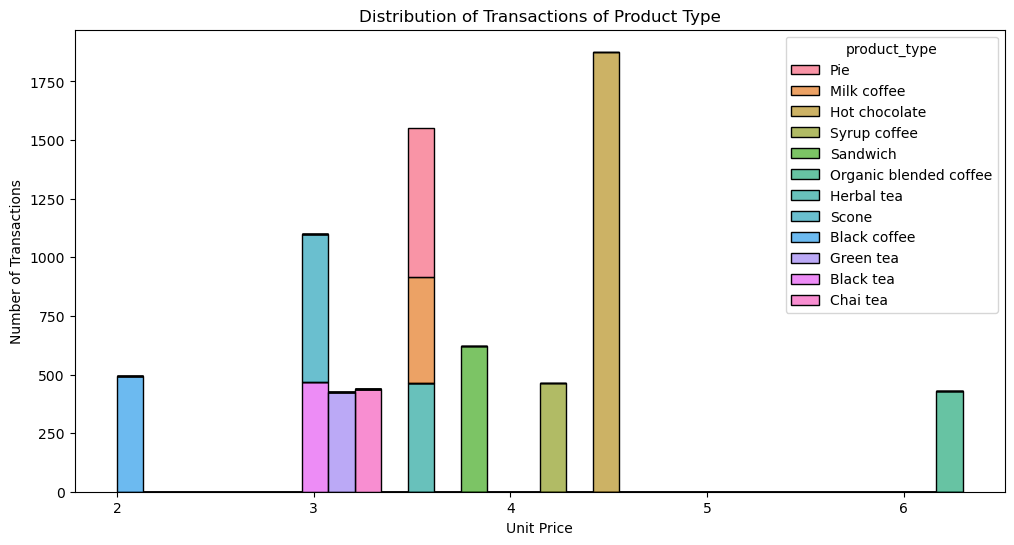

In [374]:
# Group data by product type and calculate descriptive statistics for unit price
producttype_price_stats = df_ttr.groupby('product_type')['unit_price']
print(producttype_price_stats.describe())

# Visualization of the distribution of unit price by product type
plt.figure(figsize=(12, 6))
sns.histplot(data=df_ttr, x='unit_price', hue='product_type', multiple='stack', kde=False)
plt.title('Distribution of Transactions of Product Type')
plt.xlabel('Unit Price')
plt.ylabel('Number of Transactions')
plt.show()
# After looking at the distribution of the data through both .describe() and the histogram, we can see that the data is symmetrically distributed.
# This is because the product categories all have their own unique fixed unit prices.

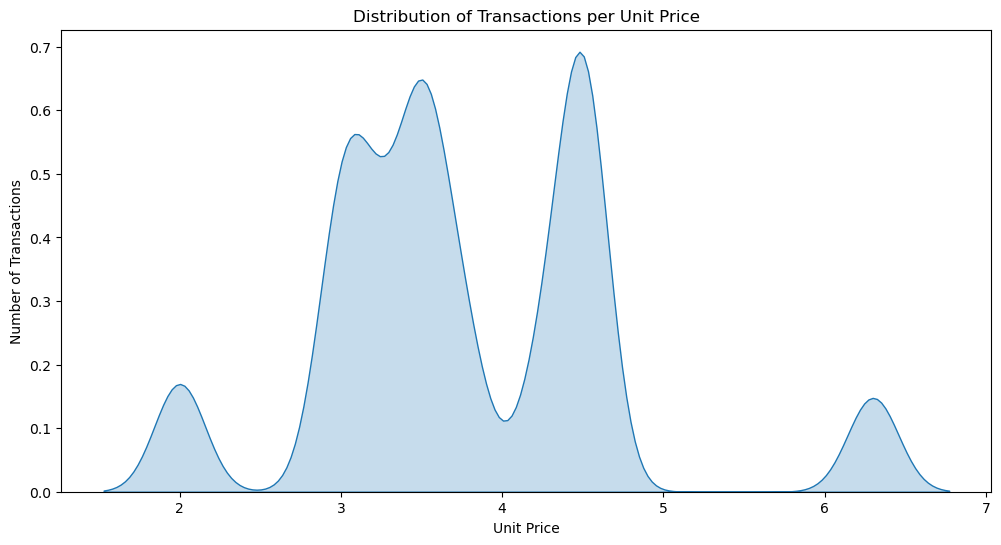

Mean of the unit price: 3.774797406807131
Median of the unit price: 3.5


In [375]:
# Distribution plot for the distribution of transactions per unit price
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_ttr, x='unit_price', fill=True)
plt.title('Distribution of Transactions per Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Number of Transactions')
plt.show()

# Mean and median of the unit price
mean_unitprice = df_ttr['unit_price'].mean()
median_unitprice = df_ttr['unit_price'].median()

print("Mean of the unit price:", mean_unitprice)
print("Median of the unit price:", median_unitprice)

# Looking at the overall distribution of the unit price for all transactions in the dataset, we can see that the data is skewed to the right.
# This can be confirmed since the median is smaller mean.


# Question 3
TTR would like to obtain insight in the average revenue per transaction. 
Because you are working with sample data, they would like to also report the interval in which the real (population) average revenue per transaction is likely to fall. 
Report and explain your analysis and conclusion.

In [376]:
# Calculate the revenue for each transaction
df_ttr['revenue'] = df_ttr['transaction_qty'] * df_ttr['unit_price']

df_ttr.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,day_of_week,day_name,revenue
0,2023-05-19,10:06:47,1,3,Breda,3.5,Bakery,Pie,5,Friday,3.5
1,2023-05-17,08:51:00,5,3,Breda,3.5,Coffee,Milk coffee,3,Wednesday,17.5
2,2023-05-20,13:26:48,2,2,Groningen,3.5,Coffee,Milk coffee,6,Saturday,7.0
3,2023-05-18,14:07:38,1,3,Breda,4.5,Chocolate,Hot chocolate,4,Thursday,4.5
4,2023-05-18,12:09:29,4,2,Groningen,4.5,Chocolate,Hot chocolate,4,Thursday,18.0


In [377]:
# Calculate the average revenue per transaction
avg_revenue = df_ttr['revenue'].mean()
print("The average revenue per transaction is", avg_revenue)

# Data for the confidence interval calculation
confidence_level = 0.95
degrees_freedom = len(df_ttr) - 1
std_error_mean = np.std(df_ttr['revenue']) / np.sqrt(len(df_ttr))

# Calculate the confidence interval for the average revenue per transaction of the dataset compared to the population
confidence_interval_avg_revenue = stats.t.interval(confidence_level, degrees_freedom, avg_revenue, std_error_mean)

# Print the confidence interval
print("The 95% confidence interval for the average revenue per transaction is", confidence_interval_avg_revenue)
# The range in which the average revenue per transaction for the population lies is between 7.46 and 7.68

The average revenue per transaction is 7.5740140464613726
The 95% confidence interval for the average revenue per transaction is (7.459767031084147, 7.688261061838598)


# Part 2
TTR would like receive three points of advice on increasing revenues, based on three other questions that
you examine. To provide sound advice, you report for each question the results of a descriptive analysis
and inferential analysis. Based on the results of the descriptive analysis, you make an assumption (you
formulate hypotheses) which you test using inferential statistical analysis. Your points of advice are based
on those results.

# Question A2: Descriptive analysis
How well do different product categories sell in terms of revenue?

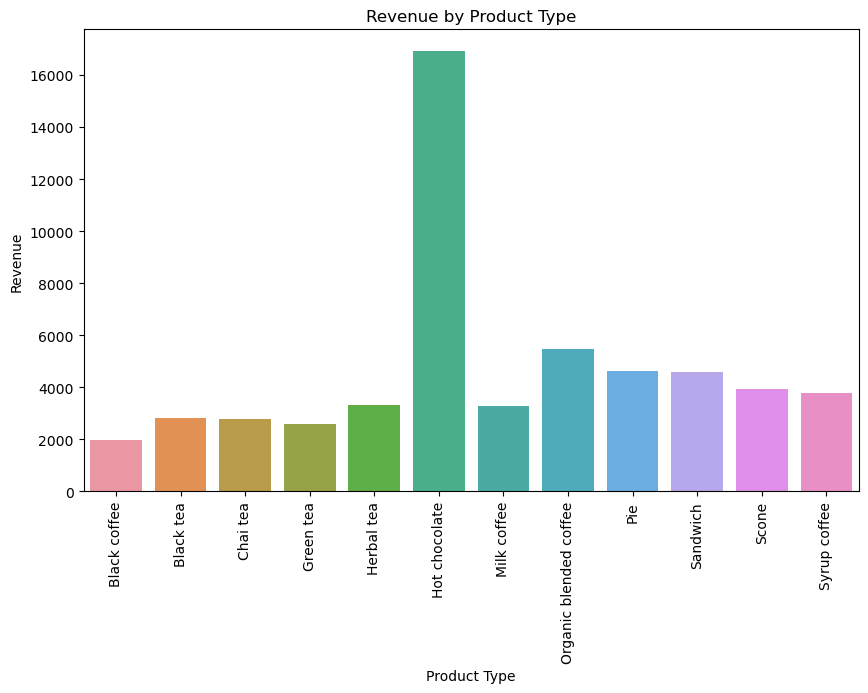

product_type
Black coffee               1980.00
Black tea                  2826.00
Chai tea                   2801.50
Green tea                  2579.85
Herbal tea                 3311.00
Hot chocolate             16906.50
Milk coffee                3286.50
Organic blended coffee     5468.40
Pie                        4613.00
Sandwich                   4582.50
Scone                      3936.00
Syrup coffee               3786.75
Name: revenue, dtype: float64


In [378]:
# Group the data by product type and calculate the total revenue for each category
product_type_revenue = df_ttr.groupby('product_type')['revenue'].sum()

# Plot a bar chart of the revenue for each product category
plt.figure(figsize=(10,6))
sns.barplot(x=product_type_revenue.index, y=product_type_revenue.values)
plt.title('Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Revenue')
plt.xticks(rotation=90, fontsize=10)
plt.show()

# Show revenue for each product type
print(product_type_revenue)

# Question A2: inferential analysis
Are there product types that sell worse than others? And is this difference statistically significant?

Based on the results of the resultes of the descriptive analysis, I want to know if black coffee sells worse than hot chocolate.

Hypotheses: <br>
Alternative Hypothesis (Ha): There is a significant difference in the revenue of product type 'Black coffee' and 'Hot chocolate', with the revenue of 'Black coffee' being worse.<br>
Null Hypothesis (H0): There is no significant difference in the revenue of product type 'Black coffee' and 'Hot chocolate' or there is and the revenue is better than 'Hot chocolate.


In [379]:
# Separate the data into groups based on product type
black_coffee = df_ttr[df_ttr['product_type'] == 'Black coffee']
hot_chocolate = df_ttr[df_ttr['product_type'] == 'Hot chocolate']

# Calculate the mean revenue for each group
mean_black_coffee = black_coffee['revenue'].mean()
mean_hot_chocolate = hot_chocolate['revenue'].mean()
print(mean_black_coffee)
print(mean_hot_chocolate)

# Perform an independent t-test
ttest_ind = stats.ttest_ind(black_coffee['revenue'], hot_chocolate['revenue'], alternative='less')
print(f"T-test results: {ttest_ind}")

# The p-value is 0.05, which is less than the significance level of 0.05. Therefore, we reject to reject the null hypothesis. 
# Thus, there is a statistically significant difference in the revenue between Black Coffee and Hot Chocolate, with Black Coffee having a lower revenue than Hot Chocolate. 


4.0
9.00719232818327
T-test results: TtestResult(statistic=-20.342089809743833, pvalue=3.2135188094033157e-85, df=2370.0)


# Question C1: Descriptive analysis
How do tea room locations compare in terms of sales revenue?

store_location
Alkmaar      14499.9
Breda        14454.8
Groningen    27123.3
Name: revenue, dtype: float64


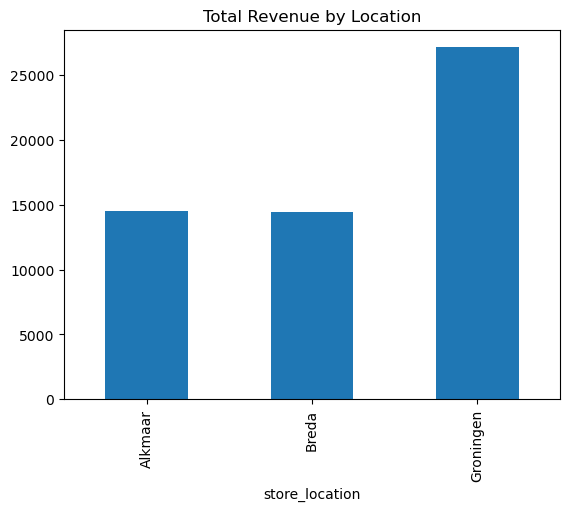

In [380]:
# Group the data by location and calculate the total revenue for each location
location_revenue = df_ttr.groupby('store_location')['revenue'].sum()
print(location_revenue)

# Plot the total revenue for each location
location_revenue.plot(kind='bar', title='Total Revenue by Location')

# Store the total revenue for each location in a new DataFrame
df_location_revenue = pd.DataFrame(location_revenue)
df_location_revenue.reset_index(inplace=True)
df_location_revenue.columns = ['store_location', 'revenue']


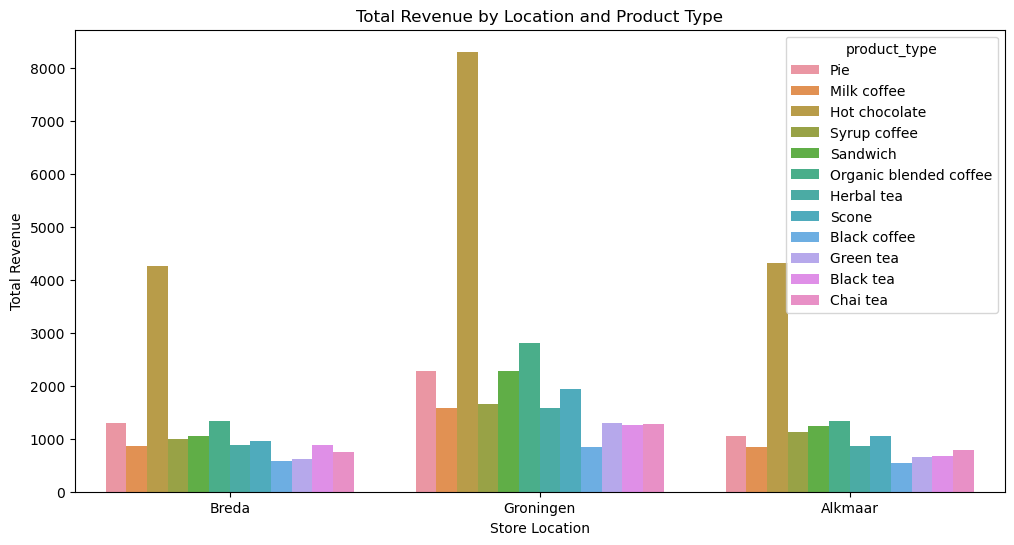

In [381]:
# barchart that shows the total revenue for each location grouped by product type
plt.figure(figsize=(12, 6))
sns.barplot(data=df_ttr, x='store_location', y='revenue', hue='product_type', estimator=sum, errorbar=None)
plt.title('Total Revenue by Location and Product Type')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.show()

# Create

# Question C1: Inferential analysis
Are there statistically significant differences between locations?

Based on the results of the Descriptive analysis results, I want to know if there is a difference between Groningen and the other stores.

Hypotheses: <br>
Alternative Hypothesis (Ha): There is a significant difference in the revenue of Store location Groningen and the other 2, Alkmaar & Breda, with the revenue of Groningen being better.<br>
Null Hypothesis (H0): There is no significant difference in the revenue of Store location Groningen and the other 2, Alkmaar & Breda, or there is and the revenue in Groningen is worse.


In [383]:
# Get mean weekly revenue from weekly revenue dataframe
mean_locations_revenue = df_location_revenue['revenue'].mean()
std_dev_locations_revenue = df_location_revenue['revenue'].std()

groningen_revenue = df_location_revenue[df_location_revenue['store_location'] == 'Groningen']['revenue']
mean_groningen_revenue = df_location_revenue[df_location_revenue['store_location'] == 'Groningen']['revenue'].values[0]


# Calculate the z-score for the revenue on Groningen
z_score_groningen = (mean_groningen_revenue - mean_locations_revenue) / (std_dev_locations_revenue / np.sqrt(len(groningen_revenue)))
print("The z-score for the revenue on Monday is:", z_score_groningen)

# Calculate the p-value for the revenue on Groningen
p_value_groningen = stats.norm.cdf(z_score_groningen)
print("The p-value for the revenue on Monday is:", p_value_groningen)

# The probability of Groningen generating the same amount of revenue compared to other locations is 0.87, which is more than the significance level of 0.05. 
# Therefore, we cannot reject to reject the null hypothesis. Thus, there is not a statistically significant difference for the revenue in Groningen compared to the revenues other locations.

The z-score for the revenue on Monday is: 1.15469503096566
The p-value for the revenue on Monday is: 0.875892332452092


# Question E1: Descriptive analysis
How do sales revenues during the week evolve?

day_name
Friday        9913.75
Monday        2846.80
Saturday     11510.90
Sunday        8905.65
Thursday      8794.35
Tuesday       6282.95
Wednesday     7823.60
Name: revenue, dtype: float64


<Axes: title={'center': 'Total Revenue by Day of the Week'}, xlabel='day_name'>

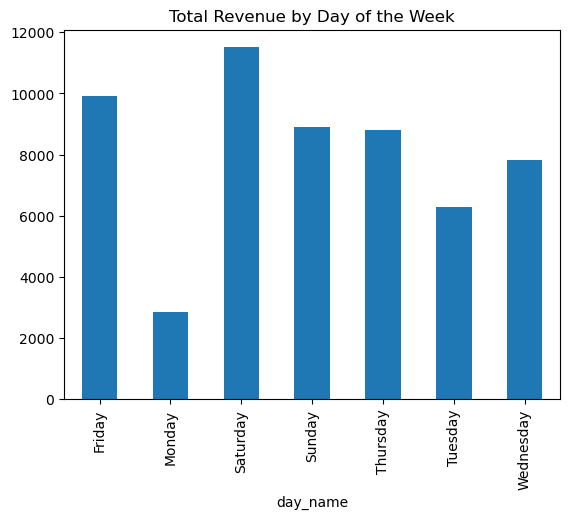

In [384]:
# Group the data by day of the week and calculate the total revenue for each day
weekly_revenue = df_ttr.groupby('day_name')['revenue'].sum()

# Print the total revenue for each day of the week
print(weekly_revenue)

#add weekly revenue to a new dataframe
df_weekly_revenue = pd.DataFrame(weekly_revenue).reset_index()

# Plot the total revenue for each day of the week
weekly_revenue.plot(kind='bar', title='Total Revenue by Day of the Week')

# Question E1: inferential analysis
Are there statistically significant differences in sales revenue between days?

Based on the results of the Descriptive analysis results, I want to know if there is a difference in the revenue generated on Monday compared to the other groups.

Hypotheses: <br>
Alternative Hypothesis (Ha): There is a significant difference in the revenue of generated on Monday compared to the other days of the week, with the revenue on Monday being worse.<br>
Null Hypothesis (H0): There is no significant difference in the revenue generated on Monday compared to the other days of the week, or there is and the revenue the other days.


In [386]:
# Get mean weekly revenue from weekly revenue dataframe
mean_alldaysofweek_revenue = df_weekly_revenue['revenue'].mean()
std_dev_weekly_revenue = df_weekly_revenue['revenue'].std()

monday_revenue = df_weekly_revenue[df_weekly_revenue['day_name'] == 'Monday']['revenue']
mean_monday_revenue = df_weekly_revenue[df_weekly_revenue['day_name'] == 'Monday']['revenue'].values[0]


# Calculate the z-score for the revenue on Monday
z_score_monday = (mean_monday_revenue - mean_alldaysofweek_revenue) / (std_dev_weekly_revenue / np.sqrt(len(monday_revenue)))
print("The z-score for the revenue on Monday is:", z_score_monday)

# Calculate the p-value for the revenue on Monday
p_value_monday = stats.norm.cdf(z_score_monday)
print("The p-value for the revenue on Monday is:", p_value_monday)

# The probability of Monday generating the same amount of revenue compared to other days of the week is lower 0.05, which is less than the significance level of 0.05. 
# Therefore, we reject to reject the null hypothesis. Thus, there is a statistically significant difference in the revenue on Monday compared to the average revenue across all days of the week.
# And since the z-score is negative, the revenue on Monday is lower than the average revenue across all days of the week.

The z-score for the revenue on Monday is: -1.8457028364681909
The p-value for the revenue on Monday is: 0.03246768257312588
